<a href="https://colab.research.google.com/github/pbcquoc/vietocr/blob/master/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
print(torch.__version__)

1.10.0+cu111


In [ ]:

from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !zip -r /content/vietocr.zip /content/drive/MyDrive/vietocr


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [ ]:
!pip install vietocr==0.3.7

     |████████████████████████████████| 280 kB 9.2 MB/s 
     |████████████████████████████████| 948 kB 39.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.11.0-py3-none-any.whl size=9633 sha256=790754f516b7daaa318471a2e2599cc0e7bdab1b96eacc1b1c82d18273af495b
  Stored in directory: /root/.cache/pip/wheels/05/e6/10/9cbfea8dcf9fde0f406da1e4c71d5c3cf3c99e0502d7f08ac6
Successfully built gdown
  Attempting uninstall: lmdb
    Found existing installation: lmdb 0.99
    Uninstalling lmdb-0.99:
      Successfully uninstalled lmdb-0.99
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4
ERROR: pip's dependency resolver does 

# Inference

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [ ]:
config['weights'] = '/content/drive/MyDrive/vietocr/weights/transformerocr.pth'
#config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

In [ ]:
detector = Predictor(config)

In [ ]:
%cd /content/drive/MyDrive/vietocr/
# ! gdown --id 1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
! unzip  combine.zip

/content/drive/MyDrive/vietocr
Archive:  combine.zip
replace __MACOSX/._combine? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace combine/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/combine/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/combine/._Testa_norm? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
N
N
N
N
N
n
n
n
n
N


In [ ]:
! ls sample | shuf |head -n 5

036200006617.jpeg
459_Silliest_70946.jpg
24775.jpg
036183007715.jpeg
001195005971.jpeg


'MANG'

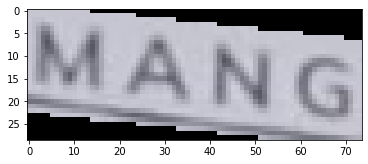

In [ ]:
img = '/content/drive/MyDrive/vietocr/dataA_norm/Testa_norm/pic_1_3.png'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Download sample dataset

In [ ]:
%cd /content/drive/MyDrive/vietocr/train3k5_resized
# !ls

/content/drive/MyDrive/vietocr/train3k5_resized


In [ ]:
# ! gdown https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE
# ! unzip  -qq -o ./Testa_resized.zip

In [ ]:
# ! unzip -qq -o ./train_resized.zip


# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [ ]:
!zip -r /content/vietocr.zip /usr/local/lib/python3.7/dist-packages/vietocr

  adding: usr/local/lib/python3.7/dist-packages/vietocr/ (stored 0%)
  adding: usr/local/lib/python3.7/dist-packages/vietocr/__init__.py (stored 0%)
  adding: usr/local/lib/python3.7/dist-packages/vietocr/tool/ (stored 0%)
  adding: usr/local/lib/python3.7/dist-packages/vietocr/tool/config.py (deflated 66%)
  adding: usr/local/lib/python3.7/dist-packages/vietocr/tool/__init__.py (stored 0%)
  adding: usr/local/lib/python3.7/dist-packages/vietocr/tool/utils.py (deflated 67%)
  adding: usr/local/lib/python3.7/dist-packages/vietocr/tool/logger.py (deflated 47%)
  adding: usr/local/lib/python3.7/dist-packages/vietocr/tool/predictor.py (deflated 71%)
  adding: usr/local/lib/python3.7/dist-packages/vietocr/tool/translate.py (deflated 71%)
  adding: usr/local/lib/python3.7/dist-packages/vietocr/tool/__pycache__/ (stored 0%)
  adding: usr/local/lib/python3.7/dist-packages/vietocr/tool/__pycache__/__init__.cpython-37.pyc (deflated 19%)
  adding: usr/local/lib/python3.7/dist-packages/vietocr/too

In [ ]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:
%cd /content/drive/MyDrive/vietocr
!pwd

/content/drive/MyDrive/vietocr
/content/drive/MyDrive/vietocr


In [ ]:
config['vocab'] = '°aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

dataset_params = {
    'name':'trainfullnewvalidvalid_3', # tên dataset do bạn tự đặt
    'data_root':'./train3k5_resized/', # thư mục chứa dữ liệu bao gồm ảnh và nhãn
    'train_annotation':'train.txt', # ảnh và nhãn tập train
    'valid_annotation':'valid.txt' # ảnh và nhãn tập test
}

params = {
            ##saving checkpoint
         'print_every':200,
         #'valid_every':15*100,
          'valid_every':2000,
          #'iters':20000,
          'iters':50000,
          'checkpoint':'./checkpoint/',    
          'export':'./weightsfullnew_1/',
          #'metrics': 6000
          'metrics': 7139,
          'log': './trainfullnewvalidvalid_1.log'
         }
config['pretrain']['cached']= '/tmp/transformerorc.pth'
config['dataloader']['num_workers']=2
# config['weights']='https://drive.google.com/file/d/1j2gmVepR2n2CfX6TcLJHZAtbWorUxU2J/view?usp=sharing'
config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [ ]:
config

{'aug': {'image_aug': True, 'masked_language_model': True},
 'backbone': 'vgg19_bn',
 'cnn': {'hidden': 256,
  'ks': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
  'pretrained': True,
  'ss': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]]},
 'dataloader': {'num_workers': 2, 'pin_memory': True},
 'dataset': {'data_root': './train3k5_resized/',
  'image_height': 32,
  'image_max_width': 512,
  'image_min_width': 32,
  'name': 'trainfullnewvalidvalid_3',
  'train_annotation': 'train.txt',
  'valid_annotation': 'valid.txt'},
 'device': 'cuda:0',
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'predictor': {'beamsearch': False},
 'pretrain': {'cached': '/tmp/transformerorc.pth',
  'id_or_url': '13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA',
  'md5': 'af6b46e9295eb1c27ca90bddf8c8729a'},
 'quiet': False,
 'seq_modeling': 'transformer',
 'trainer': {'batch_size': 32,
  'checkpoint': './checkpoint/',
  'export': './weightsfullnew_1/',
  'iters': 50000,
  'log': './trainfullnewvalidvalid_1.log',
  'metrics': 7

You should train model from our pretrained 

In [ ]:
# !pip install torch torchvision
trainer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Cached Downloading: /tmp/transformerorc.pth
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmppvz4qluw/dl
100%|██████████| 152M/152M [00:00<00:00, 198MB/s]


Computing MD5: /tmp/transformerorc.pth
MD5 matches: /tmp/transformerorc.pth
transformer.embed_tgt.weight missmatching shape, required torch.Size([234, 256]) but found torch.Size([233, 256])
transformer.fc.weight missmatching shape, required torch.Size([234, 256]) but found torch.Size([233, 256])
transformer.fc.bias missmatching shape, required torch.Size([234]) but found torch.Size([233])
train_trainfullnewvalidvalid_3 exists. Remove folder if you want to create new dataset


train_trainfullnewvalidvalid_3 build cluster: 100%|█████████| 68701/68701 [00:07<00:00, 8949.59it/s]

valid_trainfullnewvalidvalid_3 exists. Remove folder if you want to create new dataset



valid_trainfullnewvalidvalid_3 build cluster: 100%|██████████| 7138/7138 [00:00<00:00, 71789.83it/s]


Save model configuration for inference, load_config_from_file

In [ ]:
from datetime import date
today = str(date.today())
trainer.config.save(today+'config.yml')

Visualize your dataset to check data augmentation is appropriate

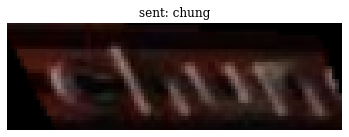

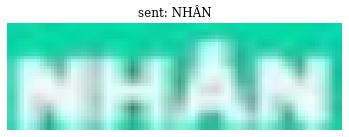

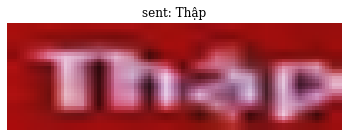

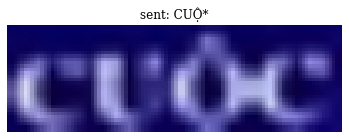

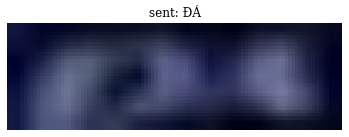

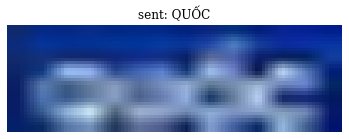

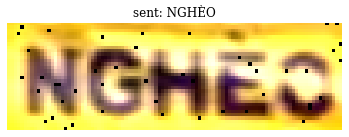

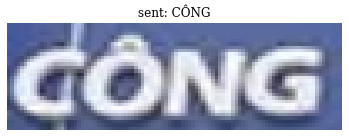

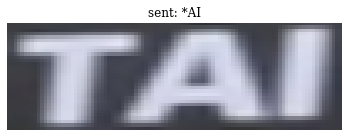

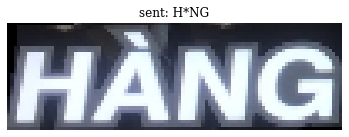

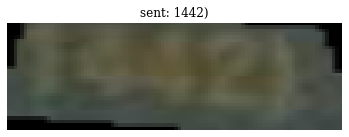

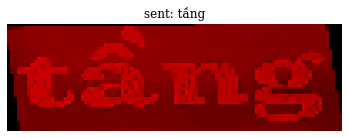

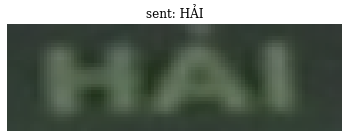

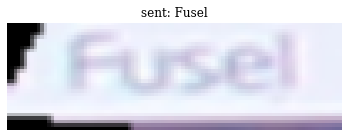

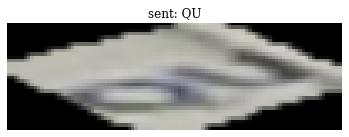

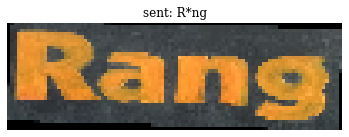

In [ ]:
trainer.visualize_dataset()

Train now

In [ ]:
# trainer.model.load_state_dict(torch.load('model.pt'))
trainer.train()

  0%|          | 200/50000 [01:10<5:00:26,  2.76it/s]

iter: 000200 - train loss: 2.395 - lr: 1.31e-05 - load time: 0.75 - gpu time: 69.34


  1%|          | 400/50000 [02:16<4:14:03,  3.25it/s]

iter: 000400 - train loss: 2.187 - lr: 1.65e-05 - load time: 0.22 - gpu time: 64.77


  1%|          | 600/50000 [03:23<4:11:20,  3.28it/s]

iter: 000600 - train loss: 2.047 - lr: 2.21e-05 - load time: 0.27 - gpu time: 65.71


  2%|▏         | 800/50000 [04:29<4:29:35,  3.04it/s]

iter: 000800 - train loss: 1.913 - lr: 2.98e-05 - load time: 0.29 - gpu time: 65.42


  2%|▏         | 1000/50000 [05:36<4:37:24,  2.94it/s]

iter: 001000 - train loss: 1.787 - lr: 3.95e-05 - load time: 0.29 - gpu time: 66.29


  2%|▏         | 1200/50000 [06:45<4:37:36,  2.93it/s]

iter: 001200 - train loss: 1.564 - lr: 5.10e-05 - load time: 0.28 - gpu time: 67.14


  3%|▎         | 1400/50000 [07:53<4:45:22,  2.84it/s]

iter: 001400 - train loss: 1.391 - lr: 6.42e-05 - load time: 0.27 - gpu time: 67.49


  3%|▎         | 1600/50000 [09:01<4:36:23,  2.92it/s]

iter: 001600 - train loss: 1.210 - lr: 7.89e-05 - load time: 0.21 - gpu time: 66.98


  4%|▎         | 1800/50000 [10:08<4:27:34,  3.00it/s]

iter: 001800 - train loss: 1.063 - lr: 9.47e-05 - load time: 0.28 - gpu time: 65.32


  4%|▍         | 1999/50000 [11:14<4:53:52,  2.72it/s]

iter: 002000 - train loss: 0.999 - lr: 1.12e-04 - load time: 0.27 - gpu time: 65.66


/usr/local/lib/python3.7/dist-packages/vietocr/tool/translate.py:115: RuntimeWarning: invalid value encountered in true_divide
  char_probs = np.sum(char_probs, axis=-1)/(char_probs>0).sum(-1)


iter: 002000 - valid loss: 0.899 - acc full seq: 0.4825 - acc per char: 0.7326


  4%|▍         | 2200/50000 [14:12<4:30:43,  2.94it/s]

iter: 002200 - train loss: 0.916 - lr: 1.29e-04 - load time: 0.80 - gpu time: 66.20


  5%|▍         | 2400/50000 [15:18<4:38:47,  2.85it/s]

iter: 002400 - train loss: 0.891 - lr: 1.47e-04 - load time: 0.37 - gpu time: 65.31


  5%|▌         | 2600/50000 [16:26<4:30:45,  2.92it/s]

iter: 002600 - train loss: 0.837 - lr: 1.65e-04 - load time: 0.33 - gpu time: 66.68


  6%|▌         | 2800/50000 [17:34<4:35:15,  2.86it/s]

iter: 002800 - train loss: 0.837 - lr: 1.83e-04 - load time: 0.31 - gpu time: 66.25


  6%|▌         | 3000/50000 [18:42<4:39:20,  2.80it/s]

iter: 003000 - train loss: 0.812 - lr: 2.01e-04 - load time: 0.40 - gpu time: 67.08


  6%|▋         | 3200/50000 [19:47<3:52:58,  3.35it/s]

iter: 003200 - train loss: 0.784 - lr: 2.17e-04 - load time: 0.45 - gpu time: 63.94


  7%|▋         | 3400/50000 [20:56<4:16:46,  3.02it/s]

iter: 003400 - train loss: 0.777 - lr: 2.33e-04 - load time: 0.39 - gpu time: 67.59


  7%|▋         | 3600/50000 [22:03<3:50:45,  3.35it/s]

iter: 003600 - train loss: 0.800 - lr: 2.48e-04 - load time: 0.37 - gpu time: 66.39


  8%|▊         | 3800/50000 [23:12<4:19:42,  2.96it/s]

iter: 003800 - train loss: 0.793 - lr: 2.61e-04 - load time: 0.39 - gpu time: 67.66


  8%|▊         | 3999/50000 [24:20<4:27:42,  2.86it/s]

iter: 004000 - train loss: 0.758 - lr: 2.73e-04 - load time: 0.44 - gpu time: 67.58
iter: 004000 - valid loss: 0.748 - acc full seq: 0.6732 - acc per char: 0.8080


  8%|▊         | 4200/50000 [28:32<4:05:09,  3.11it/s]

iter: 004200 - train loss: 0.754 - lr: 2.82e-04 - load time: 0.40 - gpu time: 66.33


  9%|▉         | 4400/50000 [29:40<4:48:15,  2.64it/s]

iter: 004400 - train loss: 0.735 - lr: 2.90e-04 - load time: 0.98 - gpu time: 65.70


  9%|▉         | 4600/50000 [30:46<4:18:47,  2.92it/s]

iter: 004600 - train loss: 0.731 - lr: 2.95e-04 - load time: 0.40 - gpu time: 65.18


 10%|▉         | 4800/50000 [31:55<4:35:09,  2.74it/s]

iter: 004800 - train loss: 0.712 - lr: 2.99e-04 - load time: 0.36 - gpu time: 67.34


 10%|█         | 5000/50000 [33:02<4:24:53,  2.83it/s]

iter: 005000 - train loss: 0.728 - lr: 3.00e-04 - load time: 0.42 - gpu time: 66.20


 10%|█         | 5200/50000 [34:08<4:21:25,  2.86it/s]

iter: 005200 - train loss: 0.711 - lr: 3.00e-04 - load time: 0.41 - gpu time: 64.74


 11%|█         | 5400/50000 [35:15<4:07:11,  3.01it/s]

iter: 005400 - train loss: 0.706 - lr: 3.00e-04 - load time: 0.38 - gpu time: 66.49


 11%|█         | 5600/50000 [36:21<4:35:08,  2.69it/s]

iter: 005600 - train loss: 0.726 - lr: 3.00e-04 - load time: 0.36 - gpu time: 64.62


 12%|█▏        | 5800/50000 [37:30<3:54:54,  3.14it/s]

iter: 005800 - train loss: 0.693 - lr: 3.00e-04 - load time: 0.45 - gpu time: 68.06


 12%|█▏        | 5999/50000 [38:39<4:15:41,  2.87it/s]

iter: 006000 - train loss: 0.688 - lr: 3.00e-04 - load time: 0.44 - gpu time: 67.59
iter: 006000 - valid loss: 0.717 - acc full seq: 0.6953 - acc per char: 0.8180


 12%|█▏        | 6200/50000 [42:29<3:35:17,  3.39it/s]

iter: 006200 - train loss: 0.690 - lr: 2.99e-04 - load time: 0.40 - gpu time: 67.77


 13%|█▎        | 6400/50000 [43:37<3:58:12,  3.05it/s]

iter: 006400 - train loss: 0.691 - lr: 2.99e-04 - load time: 0.33 - gpu time: 66.33


 13%|█▎        | 6600/50000 [44:45<3:55:29,  3.07it/s]

iter: 006600 - train loss: 0.653 - lr: 2.99e-04 - load time: 0.90 - gpu time: 66.41


 14%|█▎        | 6800/50000 [45:51<4:07:29,  2.91it/s]

iter: 006800 - train loss: 0.656 - lr: 2.99e-04 - load time: 0.42 - gpu time: 65.22


 14%|█▍        | 7000/50000 [46:59<3:29:54,  3.41it/s]

iter: 007000 - train loss: 0.670 - lr: 2.99e-04 - load time: 0.29 - gpu time: 66.34


 14%|█▍        | 7200/50000 [48:08<3:39:17,  3.25it/s]

iter: 007200 - train loss: 0.678 - lr: 2.98e-04 - load time: 0.38 - gpu time: 68.74


 15%|█▍        | 7400/50000 [49:15<4:10:10,  2.84it/s]

iter: 007400 - train loss: 0.659 - lr: 2.98e-04 - load time: 0.40 - gpu time: 65.83


 15%|█▌        | 7600/50000 [50:24<5:41:06,  2.07it/s]

iter: 007600 - train loss: 0.640 - lr: 2.98e-04 - load time: 0.34 - gpu time: 67.85


 16%|█▌        | 7800/50000 [51:33<3:58:05,  2.95it/s]

iter: 007800 - train loss: 0.649 - lr: 2.97e-04 - load time: 0.36 - gpu time: 67.80


 16%|█▌        | 7999/50000 [52:40<3:49:17,  3.05it/s]

iter: 008000 - train loss: 0.660 - lr: 2.97e-04 - load time: 0.34 - gpu time: 65.86
iter: 008000 - valid loss: 0.675 - acc full seq: 0.7296 - acc per char: 0.8333


 16%|█▋        | 8200/50000 [1:06:46<3:53:24,  2.98it/s]

iter: 008200 - train loss: 0.637 - lr: 2.96e-04 - load time: 0.40 - gpu time: 67.89


 17%|█▋        | 8400/50000 [1:07:54<4:50:16,  2.39it/s]

iter: 008400 - train loss: 0.652 - lr: 2.96e-04 - load time: 0.48 - gpu time: 66.70


 17%|█▋        | 8600/50000 [1:09:01<4:20:40,  2.65it/s]

iter: 008600 - train loss: 0.645 - lr: 2.95e-04 - load time: 0.92 - gpu time: 65.36


 18%|█▊        | 8800/50000 [1:10:08<4:21:30,  2.63it/s]

iter: 008800 - train loss: 0.625 - lr: 2.95e-04 - load time: 0.42 - gpu time: 66.10


 18%|█▊        | 9000/50000 [1:11:15<3:40:43,  3.10it/s]

iter: 009000 - train loss: 0.635 - lr: 2.94e-04 - load time: 0.40 - gpu time: 65.54


 18%|█▊        | 9200/50000 [1:12:23<3:57:57,  2.86it/s]

iter: 009200 - train loss: 0.639 - lr: 2.94e-04 - load time: 0.36 - gpu time: 66.58


 19%|█▉        | 9400/50000 [1:13:30<3:30:35,  3.21it/s]

iter: 009400 - train loss: 0.624 - lr: 2.93e-04 - load time: 0.48 - gpu time: 65.75


 19%|█▉        | 9600/50000 [1:14:40<3:35:07,  3.13it/s]

iter: 009600 - train loss: 0.616 - lr: 2.92e-04 - load time: 0.48 - gpu time: 69.13


 20%|█▉        | 9800/50000 [1:15:50<3:29:42,  3.19it/s]

iter: 009800 - train loss: 0.626 - lr: 2.92e-04 - load time: 0.40 - gpu time: 69.08


 20%|█▉        | 9999/50000 [1:16:58<3:38:29,  3.05it/s]

iter: 010000 - train loss: 0.623 - lr: 2.91e-04 - load time: 0.42 - gpu time: 66.42
iter: 010000 - valid loss: 0.658 - acc full seq: 0.7381 - acc per char: 0.8383


 20%|██        | 10200/50000 [1:20:03<3:28:33,  3.18it/s]

iter: 010200 - train loss: 0.627 - lr: 2.90e-04 - load time: 0.32 - gpu time: 66.86


 21%|██        | 10400/50000 [1:21:10<3:59:21,  2.76it/s]

iter: 010400 - train loss: 0.627 - lr: 2.89e-04 - load time: 0.47 - gpu time: 65.79


 21%|██        | 10600/50000 [1:22:18<3:07:00,  3.51it/s]

iter: 010600 - train loss: 0.625 - lr: 2.89e-04 - load time: 0.43 - gpu time: 67.23


 22%|██▏       | 10800/50000 [1:23:28<4:09:57,  2.61it/s]

iter: 010800 - train loss: 0.606 - lr: 2.88e-04 - load time: 0.93 - gpu time: 68.00


 22%|██▏       | 11000/50000 [1:24:36<3:29:45,  3.10it/s]

iter: 011000 - train loss: 0.604 - lr: 2.87e-04 - load time: 0.52 - gpu time: 66.43


 22%|██▏       | 11200/50000 [1:25:43<3:14:11,  3.33it/s]

iter: 011200 - train loss: 0.594 - lr: 2.86e-04 - load time: 0.37 - gpu time: 65.92


 23%|██▎       | 11400/50000 [1:26:51<3:05:13,  3.47it/s]

iter: 011400 - train loss: 0.605 - lr: 2.85e-04 - load time: 0.38 - gpu time: 67.62


 23%|██▎       | 11600/50000 [1:27:56<3:31:15,  3.03it/s]

iter: 011600 - train loss: 0.622 - lr: 2.84e-04 - load time: 0.40 - gpu time: 63.34


 24%|██▎       | 11800/50000 [1:29:03<3:13:01,  3.30it/s]

iter: 011800 - train loss: 0.616 - lr: 2.83e-04 - load time: 0.49 - gpu time: 66.34


 24%|██▍       | 11999/50000 [1:30:11<3:34:01,  2.96it/s]

iter: 012000 - train loss: 0.613 - lr: 2.82e-04 - load time: 0.42 - gpu time: 67.19
iter: 012000 - valid loss: 0.656 - acc full seq: 0.7493 - acc per char: 0.8433


 24%|██▍       | 12200/50000 [1:32:54<3:55:52,  2.67it/s]

iter: 012200 - train loss: 0.616 - lr: 2.81e-04 - load time: 0.35 - gpu time: 67.12


 25%|██▍       | 12400/50000 [1:34:02<3:51:27,  2.71it/s]

iter: 012400 - train loss: 0.613 - lr: 2.80e-04 - load time: 0.43 - gpu time: 67.11


 25%|██▌       | 12600/50000 [1:35:10<2:52:11,  3.62it/s]

iter: 012600 - train loss: 0.610 - lr: 2.79e-04 - load time: 0.37 - gpu time: 66.97


 26%|██▌       | 12800/50000 [1:36:17<3:32:43,  2.91it/s]

iter: 012800 - train loss: 0.621 - lr: 2.78e-04 - load time: 0.47 - gpu time: 65.84


 26%|██▌       | 13000/50000 [1:37:24<3:31:23,  2.92it/s]

iter: 013000 - train loss: 0.596 - lr: 2.77e-04 - load time: 1.05 - gpu time: 65.46


 26%|██▋       | 13200/50000 [1:38:31<2:54:39,  3.51it/s]

iter: 013200 - train loss: 0.606 - lr: 2.76e-04 - load time: 0.42 - gpu time: 65.09


 27%|██▋       | 13400/50000 [1:39:38<3:28:04,  2.93it/s]

iter: 013400 - train loss: 0.590 - lr: 2.75e-04 - load time: 0.41 - gpu time: 66.49


 27%|██▋       | 13600/50000 [1:40:47<3:56:39,  2.56it/s]

iter: 013600 - train loss: 0.594 - lr: 2.74e-04 - load time: 0.50 - gpu time: 67.26


 28%|██▊       | 13800/50000 [1:41:53<3:12:13,  3.14it/s]

iter: 013800 - train loss: 0.606 - lr: 2.73e-04 - load time: 0.43 - gpu time: 65.24


 28%|██▊       | 13999/50000 [1:43:02<3:52:04,  2.59it/s]

iter: 014000 - train loss: 0.582 - lr: 2.71e-04 - load time: 0.44 - gpu time: 67.89
iter: 014000 - valid loss: 0.645 - acc full seq: 0.7564 - acc per char: 0.8512


 28%|██▊       | 14200/50000 [1:52:50<3:06:43,  3.20it/s]

iter: 014200 - train loss: 0.582 - lr: 2.70e-04 - load time: 0.46 - gpu time: 68.26


 29%|██▉       | 14400/50000 [1:54:02<3:15:13,  3.04it/s]

iter: 014400 - train loss: 0.602 - lr: 2.69e-04 - load time: 0.50 - gpu time: 69.86


 29%|██▉       | 14600/50000 [1:55:11<2:51:02,  3.45it/s]

iter: 014600 - train loss: 0.585 - lr: 2.68e-04 - load time: 0.43 - gpu time: 68.06


 30%|██▉       | 14800/50000 [1:56:21<3:36:45,  2.71it/s]

iter: 014800 - train loss: 0.598 - lr: 2.66e-04 - load time: 0.47 - gpu time: 68.98


 30%|███       | 15000/50000 [1:57:29<3:03:58,  3.17it/s]

iter: 015000 - train loss: 0.596 - lr: 2.65e-04 - load time: 0.40 - gpu time: 66.92


 30%|███       | 15200/50000 [1:58:39<3:38:33,  2.65it/s]

iter: 015200 - train loss: 0.584 - lr: 2.64e-04 - load time: 1.07 - gpu time: 67.75


 31%|███       | 15400/50000 [1:59:49<3:08:07,  3.07it/s]

iter: 015400 - train loss: 0.582 - lr: 2.62e-04 - load time: 0.44 - gpu time: 69.21


 31%|███       | 15600/50000 [2:00:58<3:26:34,  2.78it/s]

iter: 015600 - train loss: 0.589 - lr: 2.61e-04 - load time: 0.52 - gpu time: 67.60


 32%|███▏      | 15800/50000 [2:02:06<2:37:22,  3.62it/s]

iter: 015800 - train loss: 0.593 - lr: 2.59e-04 - load time: 0.54 - gpu time: 65.97


 32%|███▏      | 15999/50000 [2:03:14<2:45:32,  3.42it/s]

iter: 016000 - train loss: 0.577 - lr: 2.58e-04 - load time: 0.44 - gpu time: 67.66
iter: 016000 - valid loss: 0.643 - acc full seq: 0.7600 - acc per char: 0.8506


 32%|███▏      | 16200/50000 [2:05:57<3:00:44,  3.12it/s]

iter: 016200 - train loss: 0.574 - lr: 2.56e-04 - load time: 0.43 - gpu time: 67.05


 33%|███▎      | 16400/50000 [2:07:06<3:16:10,  2.85it/s]

iter: 016400 - train loss: 0.579 - lr: 2.55e-04 - load time: 0.39 - gpu time: 67.35


 33%|███▎      | 16600/50000 [2:08:14<2:42:28,  3.43it/s]

iter: 016600 - train loss: 0.578 - lr: 2.53e-04 - load time: 0.45 - gpu time: 67.19


 34%|███▎      | 16800/50000 [2:09:23<4:04:54,  2.26it/s]

iter: 016800 - train loss: 0.579 - lr: 2.52e-04 - load time: 0.53 - gpu time: 67.58


 34%|███▍      | 17000/50000 [2:10:31<2:42:23,  3.39it/s]

iter: 017000 - train loss: 0.587 - lr: 2.50e-04 - load time: 0.42 - gpu time: 66.64


 34%|███▍      | 17200/50000 [2:11:37<3:14:12,  2.81it/s]

iter: 017200 - train loss: 0.598 - lr: 2.49e-04 - load time: 0.94 - gpu time: 64.91


 35%|███▍      | 17400/50000 [2:12:47<3:08:22,  2.88it/s]

iter: 017400 - train loss: 0.570 - lr: 2.47e-04 - load time: 0.52 - gpu time: 67.75


 35%|███▌      | 17600/50000 [2:13:55<3:11:27,  2.82it/s]

iter: 017600 - train loss: 0.579 - lr: 2.46e-04 - load time: 0.35 - gpu time: 66.89


 36%|███▌      | 17800/50000 [2:15:03<2:47:56,  3.20it/s]

iter: 017800 - train loss: 0.568 - lr: 2.44e-04 - load time: 0.39 - gpu time: 67.15


 36%|███▌      | 17999/50000 [2:16:09<3:07:50,  2.84it/s]

iter: 018000 - train loss: 0.587 - lr: 2.42e-04 - load time: 0.50 - gpu time: 65.00
iter: 018000 - valid loss: 0.636 - acc full seq: 0.7709 - acc per char: 0.8558


 36%|███▋      | 18200/50000 [2:18:54<2:44:46,  3.22it/s]

iter: 018200 - train loss: 0.568 - lr: 2.41e-04 - load time: 0.38 - gpu time: 68.89


 37%|███▋      | 18400/50000 [2:20:02<3:04:43,  2.85it/s]

iter: 018400 - train loss: 0.556 - lr: 2.39e-04 - load time: 0.52 - gpu time: 66.42


 37%|███▋      | 18600/50000 [2:21:09<2:31:07,  3.46it/s]

iter: 018600 - train loss: 0.574 - lr: 2.37e-04 - load time: 0.36 - gpu time: 66.16


 38%|███▊      | 18800/50000 [2:22:18<2:54:55,  2.97it/s]

iter: 018800 - train loss: 0.571 - lr: 2.36e-04 - load time: 0.47 - gpu time: 67.17


 38%|███▊      | 19000/50000 [2:23:26<3:11:30,  2.70it/s]

iter: 019000 - train loss: 0.570 - lr: 2.34e-04 - load time: 0.44 - gpu time: 66.61


 38%|███▊      | 19200/50000 [2:24:32<3:11:53,  2.68it/s]

iter: 019200 - train loss: 0.573 - lr: 2.32e-04 - load time: 0.44 - gpu time: 65.31


 39%|███▉      | 19400/50000 [2:25:40<2:55:03,  2.91it/s]

iter: 019400 - train loss: 0.557 - lr: 2.30e-04 - load time: 0.97 - gpu time: 66.15


 39%|███▉      | 19600/50000 [2:26:47<3:00:39,  2.80it/s]

iter: 019600 - train loss: 0.568 - lr: 2.29e-04 - load time: 0.41 - gpu time: 65.72


 40%|███▉      | 19800/50000 [2:27:53<3:00:30,  2.79it/s]

iter: 019800 - train loss: 0.559 - lr: 2.27e-04 - load time: 0.46 - gpu time: 64.27


 40%|███▉      | 19999/50000 [2:28:59<3:02:04,  2.75it/s]

iter: 020000 - train loss: 0.562 - lr: 2.25e-04 - load time: 0.40 - gpu time: 65.40


 40%|████      | 20000/50000 [2:29:56<145:06:18, 17.41s/it]

iter: 020000 - valid loss: 0.641 - acc full seq: 0.7708 - acc per char: 0.8574


 40%|████      | 20200/50000 [2:31:07<3:05:15,  2.68it/s]

iter: 020200 - train loss: 0.559 - lr: 2.23e-04 - load time: 0.44 - gpu time: 69.47


 41%|████      | 20400/50000 [2:32:14<3:01:53,  2.71it/s]

iter: 020400 - train loss: 0.567 - lr: 2.21e-04 - load time: 0.46 - gpu time: 66.62


 41%|████      | 20600/50000 [2:33:22<4:07:45,  1.98it/s]

iter: 020600 - train loss: 0.573 - lr: 2.19e-04 - load time: 0.47 - gpu time: 66.47


 42%|████▏     | 20800/50000 [2:34:33<3:25:18,  2.37it/s]

iter: 020800 - train loss: 0.559 - lr: 2.18e-04 - load time: 0.53 - gpu time: 69.78


 42%|████▏     | 21000/50000 [2:35:42<2:50:34,  2.83it/s]

iter: 021000 - train loss: 0.563 - lr: 2.16e-04 - load time: 0.44 - gpu time: 67.15


 42%|████▏     | 21200/50000 [2:36:52<2:50:02,  2.82it/s]

iter: 021200 - train loss: 0.548 - lr: 2.14e-04 - load time: 0.42 - gpu time: 68.92


 43%|████▎     | 21400/50000 [2:38:01<2:45:13,  2.89it/s]

iter: 021400 - train loss: 0.562 - lr: 2.12e-04 - load time: 0.41 - gpu time: 67.43


 43%|████▎     | 21600/50000 [2:39:09<2:36:23,  3.03it/s]

iter: 021600 - train loss: 0.545 - lr: 2.10e-04 - load time: 1.00 - gpu time: 66.58


 44%|████▎     | 21800/50000 [2:40:16<2:40:47,  2.92it/s]

iter: 021800 - train loss: 0.552 - lr: 2.08e-04 - load time: 0.51 - gpu time: 66.30


 44%|████▍     | 21999/50000 [2:41:23<2:36:12,  2.99it/s]

iter: 022000 - train loss: 0.547 - lr: 2.06e-04 - load time: 0.46 - gpu time: 66.13
iter: 022000 - valid loss: 0.626 - acc full seq: 0.7730 - acc per char: 0.8555


 44%|████▍     | 22200/50000 [2:44:28<2:45:47,  2.79it/s]

iter: 022200 - train loss: 0.559 - lr: 2.04e-04 - load time: 0.44 - gpu time: 70.45


 45%|████▍     | 22400/50000 [2:45:38<2:14:40,  3.42it/s]

iter: 022400 - train loss: 0.551 - lr: 2.02e-04 - load time: 0.35 - gpu time: 69.48


 45%|████▌     | 22600/50000 [2:46:44<2:23:34,  3.18it/s]

iter: 022600 - train loss: 0.544 - lr: 2.00e-04 - load time: 0.47 - gpu time: 64.73


 46%|████▌     | 22800/50000 [2:47:51<2:22:18,  3.19it/s]

iter: 022800 - train loss: 0.553 - lr: 1.98e-04 - load time: 0.36 - gpu time: 66.22


 46%|████▌     | 23000/50000 [2:48:59<2:26:50,  3.06it/s]

iter: 023000 - train loss: 0.550 - lr: 1.96e-04 - load time: 0.44 - gpu time: 66.02


 46%|████▋     | 23200/50000 [2:50:06<2:30:17,  2.97it/s]

iter: 023200 - train loss: 0.545 - lr: 1.94e-04 - load time: 0.47 - gpu time: 66.50


 47%|████▋     | 23400/50000 [2:51:15<2:31:15,  2.93it/s]

iter: 023400 - train loss: 0.564 - lr: 1.92e-04 - load time: 0.38 - gpu time: 67.40


 47%|████▋     | 23600/50000 [2:52:24<2:26:34,  3.00it/s]

iter: 023600 - train loss: 0.543 - lr: 1.90e-04 - load time: 0.98 - gpu time: 67.30


 48%|████▊     | 23800/50000 [2:53:34<2:25:22,  3.00it/s]

iter: 023800 - train loss: 0.529 - lr: 1.88e-04 - load time: 0.40 - gpu time: 68.54


 48%|████▊     | 23999/50000 [2:54:39<2:10:03,  3.33it/s]

iter: 024000 - train loss: 0.545 - lr: 1.86e-04 - load time: 0.43 - gpu time: 64.64


 48%|████▊     | 24000/50000 [2:55:37<126:13:49, 17.48s/it]

iter: 024000 - valid loss: 0.635 - acc full seq: 0.7723 - acc per char: 0.8570


 48%|████▊     | 24200/50000 [2:56:43<1:56:12,  3.70it/s]

iter: 024200 - train loss: 0.540 - lr: 1.84e-04 - load time: 0.45 - gpu time: 65.10


 49%|████▉     | 24400/50000 [2:57:52<2:17:45,  3.10it/s]

iter: 024400 - train loss: 0.550 - lr: 1.82e-04 - load time: 0.41 - gpu time: 67.84


 49%|████▉     | 24600/50000 [2:59:00<2:08:58,  3.28it/s]

iter: 024600 - train loss: 0.548 - lr: 1.80e-04 - load time: 0.51 - gpu time: 66.44


 50%|████▉     | 24800/50000 [3:00:10<2:21:10,  2.97it/s]

iter: 024800 - train loss: 0.550 - lr: 1.78e-04 - load time: 0.46 - gpu time: 68.67


 50%|█████     | 25000/50000 [3:01:17<2:19:08,  2.99it/s]

iter: 025000 - train loss: 0.540 - lr: 1.76e-04 - load time: 0.54 - gpu time: 65.82


 50%|█████     | 25200/50000 [3:02:24<2:05:53,  3.28it/s]

iter: 025200 - train loss: 0.538 - lr: 1.74e-04 - load time: 0.38 - gpu time: 65.84


 51%|█████     | 25400/50000 [3:03:33<2:32:07,  2.70it/s]

iter: 025400 - train loss: 0.542 - lr: 1.72e-04 - load time: 0.40 - gpu time: 67.67


 51%|█████     | 25600/50000 [3:04:39<2:30:52,  2.70it/s]

iter: 025600 - train loss: 0.552 - lr: 1.70e-04 - load time: 0.44 - gpu time: 65.55


 52%|█████▏    | 25800/50000 [3:05:47<2:28:37,  2.71it/s]

iter: 025800 - train loss: 0.539 - lr: 1.68e-04 - load time: 1.05 - gpu time: 65.71


 52%|█████▏    | 25999/50000 [3:06:56<1:54:01,  3.51it/s]

iter: 026000 - train loss: 0.524 - lr: 1.66e-04 - load time: 0.39 - gpu time: 68.60


 52%|█████▏    | 26000/50000 [3:07:53<115:17:00, 17.29s/it]

iter: 026000 - valid loss: 0.632 - acc full seq: 0.7702 - acc per char: 0.8568


 52%|█████▏    | 26200/50000 [3:08:59<2:12:39,  2.99it/s]

iter: 026200 - train loss: 0.537 - lr: 1.64e-04 - load time: 0.52 - gpu time: 64.46


 53%|█████▎    | 26400/50000 [3:10:08<1:55:52,  3.39it/s]

iter: 026400 - train loss: 0.536 - lr: 1.61e-04 - load time: 0.45 - gpu time: 67.28


 53%|█████▎    | 26600/50000 [3:11:17<2:26:57,  2.65it/s]

iter: 026600 - train loss: 0.541 - lr: 1.59e-04 - load time: 0.47 - gpu time: 67.95


 54%|█████▎    | 26800/50000 [3:12:25<2:04:03,  3.12it/s]

iter: 026800 - train loss: 0.534 - lr: 1.57e-04 - load time: 0.50 - gpu time: 67.16


 54%|█████▍    | 27000/50000 [3:13:34<2:07:02,  3.02it/s]

iter: 027000 - train loss: 0.532 - lr: 1.55e-04 - load time: 0.47 - gpu time: 67.06


 54%|█████▍    | 27200/50000 [3:14:45<1:54:44,  3.31it/s]

iter: 027200 - train loss: 0.540 - lr: 1.53e-04 - load time: 0.51 - gpu time: 69.82


 55%|█████▍    | 27400/50000 [3:15:52<1:53:41,  3.31it/s]

iter: 027400 - train loss: 0.531 - lr: 1.51e-04 - load time: 0.38 - gpu time: 65.89


 55%|█████▌    | 27600/50000 [3:17:00<1:59:59,  3.11it/s]

iter: 027600 - train loss: 0.542 - lr: 1.49e-04 - load time: 0.51 - gpu time: 67.25


 56%|█████▌    | 27800/50000 [3:18:08<1:40:49,  3.67it/s]

iter: 027800 - train loss: 0.530 - lr: 1.47e-04 - load time: 0.47 - gpu time: 66.02


 56%|█████▌    | 27999/50000 [3:19:17<2:15:15,  2.71it/s]

iter: 028000 - train loss: 0.521 - lr: 1.45e-04 - load time: 1.08 - gpu time: 67.41
iter: 028000 - valid loss: 0.632 - acc full seq: 0.7769 - acc per char: 0.8591


 56%|█████▋    | 28200/50000 [3:22:01<1:43:44,  3.50it/s]

iter: 028200 - train loss: 0.529 - lr: 1.43e-04 - load time: 0.46 - gpu time: 67.18


 57%|█████▋    | 28400/50000 [3:23:07<1:58:27,  3.04it/s]

iter: 028400 - train loss: 0.525 - lr: 1.41e-04 - load time: 0.46 - gpu time: 64.70


 57%|█████▋    | 28600/50000 [3:24:16<2:04:35,  2.86it/s]

iter: 028600 - train loss: 0.539 - lr: 1.38e-04 - load time: 0.49 - gpu time: 68.05


 58%|█████▊    | 28800/50000 [3:25:24<1:41:22,  3.49it/s]

iter: 028800 - train loss: 0.524 - lr: 1.36e-04 - load time: 0.47 - gpu time: 66.54


 58%|█████▊    | 29000/50000 [3:26:36<1:59:44,  2.92it/s]

iter: 029000 - train loss: 0.525 - lr: 1.34e-04 - load time: 0.52 - gpu time: 70.78


 58%|█████▊    | 29200/50000 [3:27:44<1:58:55,  2.91it/s]

iter: 029200 - train loss: 0.517 - lr: 1.32e-04 - load time: 0.44 - gpu time: 66.48


 59%|█████▉    | 29400/50000 [3:28:53<1:41:59,  3.37it/s]

iter: 029400 - train loss: 0.532 - lr: 1.30e-04 - load time: 0.38 - gpu time: 67.88


 59%|█████▉    | 29600/50000 [3:30:00<1:43:19,  3.29it/s]

iter: 029600 - train loss: 0.534 - lr: 1.28e-04 - load time: 0.38 - gpu time: 65.87


 60%|█████▉    | 29800/50000 [3:31:10<1:51:12,  3.03it/s]

iter: 029800 - train loss: 0.533 - lr: 1.26e-04 - load time: 0.40 - gpu time: 69.17


 60%|█████▉    | 29999/50000 [3:32:16<1:45:21,  3.16it/s]

iter: 030000 - train loss: 0.518 - lr: 1.24e-04 - load time: 0.48 - gpu time: 64.83
iter: 030000 - valid loss: 0.631 - acc full seq: 0.7794 - acc per char: 0.8614


 60%|██████    | 30200/50000 [3:35:03<1:46:08,  3.11it/s]

iter: 030200 - train loss: 0.520 - lr: 1.22e-04 - load time: 1.05 - gpu time: 69.10


 61%|██████    | 30400/50000 [3:36:09<1:49:56,  2.97it/s]

iter: 030400 - train loss: 0.518 - lr: 1.20e-04 - load time: 0.42 - gpu time: 64.56


 61%|██████    | 30600/50000 [3:37:15<1:36:24,  3.35it/s]

iter: 030600 - train loss: 0.527 - lr: 1.18e-04 - load time: 0.46 - gpu time: 65.43


 62%|██████▏   | 30800/50000 [3:38:22<1:40:32,  3.18it/s]

iter: 030800 - train loss: 0.518 - lr: 1.16e-04 - load time: 0.51 - gpu time: 65.31


 62%|██████▏   | 31000/50000 [3:39:30<1:50:01,  2.88it/s]

iter: 031000 - train loss: 0.514 - lr: 1.14e-04 - load time: 0.46 - gpu time: 67.19


 62%|██████▏   | 31200/50000 [3:40:40<1:42:53,  3.05it/s]

iter: 031200 - train loss: 0.517 - lr: 1.12e-04 - load time: 0.45 - gpu time: 68.14


 63%|██████▎   | 31400/50000 [3:41:46<1:42:50,  3.01it/s]

iter: 031400 - train loss: 0.523 - lr: 1.10e-04 - load time: 0.40 - gpu time: 65.14


 63%|██████▎   | 31600/50000 [3:42:54<1:45:38,  2.90it/s]

iter: 031600 - train loss: 0.513 - lr: 1.08e-04 - load time: 0.34 - gpu time: 66.64


 64%|██████▎   | 31800/50000 [3:44:00<1:32:11,  3.29it/s]

iter: 031800 - train loss: 0.523 - lr: 1.06e-04 - load time: 0.39 - gpu time: 65.03


 64%|██████▍   | 31999/50000 [3:45:07<1:42:19,  2.93it/s]

iter: 032000 - train loss: 0.522 - lr: 1.04e-04 - load time: 0.54 - gpu time: 65.99
iter: 032000 - valid loss: 0.631 - acc full seq: 0.7844 - acc per char: 0.8643


 64%|██████▍   | 32200/50000 [3:47:56<1:58:32,  2.50it/s]

iter: 032200 - train loss: 0.511 - lr: 1.02e-04 - load time: 1.04 - gpu time: 69.49


 65%|██████▍   | 32400/50000 [3:49:03<1:34:45,  3.10it/s]

iter: 032400 - train loss: 0.516 - lr: 9.97e-05 - load time: 0.40 - gpu time: 65.48


 65%|██████▌   | 32600/50000 [3:50:10<1:36:00,  3.02it/s]

iter: 032600 - train loss: 0.515 - lr: 9.77e-05 - load time: 0.43 - gpu time: 65.86


 66%|██████▌   | 32800/50000 [3:51:15<1:32:54,  3.09it/s]

iter: 032800 - train loss: 0.528 - lr: 9.57e-05 - load time: 0.47 - gpu time: 64.07


 66%|██████▌   | 33000/50000 [3:52:24<1:54:28,  2.48it/s]

iter: 033000 - train loss: 0.506 - lr: 9.38e-05 - load time: 0.51 - gpu time: 66.93


 66%|██████▋   | 33200/50000 [3:53:32<1:44:52,  2.67it/s]

iter: 033200 - train loss: 0.510 - lr: 9.19e-05 - load time: 0.49 - gpu time: 66.65


 67%|██████▋   | 33400/50000 [3:54:42<2:07:53,  2.16it/s]

iter: 033400 - train loss: 0.516 - lr: 8.99e-05 - load time: 0.46 - gpu time: 69.13


 67%|██████▋   | 33600/50000 [3:55:49<1:38:11,  2.78it/s]

iter: 033600 - train loss: 0.510 - lr: 8.80e-05 - load time: 0.44 - gpu time: 66.10


 68%|██████▊   | 33800/50000 [3:56:59<1:23:18,  3.24it/s]

iter: 033800 - train loss: 0.508 - lr: 8.61e-05 - load time: 0.54 - gpu time: 68.38


 68%|██████▊   | 33999/50000 [3:58:06<1:25:37,  3.11it/s]

iter: 034000 - train loss: 0.510 - lr: 8.42e-05 - load time: 0.42 - gpu time: 65.75


 68%|██████▊   | 34000/50000 [3:59:02<75:48:12, 17.06s/it]

iter: 034000 - valid loss: 0.633 - acc full seq: 0.7827 - acc per char: 0.8650


 68%|██████▊   | 34200/50000 [4:00:08<1:24:09,  3.13it/s]

iter: 034200 - train loss: 0.498 - lr: 8.24e-05 - load time: 0.50 - gpu time: 65.00


 69%|██████▉   | 34400/50000 [4:01:17<1:45:20,  2.47it/s]

iter: 034400 - train loss: 0.515 - lr: 8.05e-05 - load time: 0.96 - gpu time: 67.32


 69%|██████▉   | 34600/50000 [4:02:25<1:29:41,  2.86it/s]

iter: 034600 - train loss: 0.509 - lr: 7.86e-05 - load time: 0.51 - gpu time: 66.21


 70%|██████▉   | 34800/50000 [4:03:30<1:19:16,  3.20it/s]

iter: 034800 - train loss: 0.506 - lr: 7.68e-05 - load time: 0.42 - gpu time: 64.24


 70%|███████   | 35000/50000 [4:04:39<1:23:54,  2.98it/s]

iter: 035000 - train loss: 0.509 - lr: 7.50e-05 - load time: 0.37 - gpu time: 67.79


 70%|███████   | 35200/50000 [4:05:48<1:18:38,  3.14it/s]

iter: 035200 - train loss: 0.499 - lr: 7.32e-05 - load time: 0.49 - gpu time: 67.32


 71%|███████   | 35400/50000 [4:06:55<1:54:07,  2.13it/s]

iter: 035400 - train loss: 0.506 - lr: 7.14e-05 - load time: 0.48 - gpu time: 65.79


 71%|███████   | 35600/50000 [4:08:03<1:10:13,  3.42it/s]

iter: 035600 - train loss: 0.506 - lr: 6.96e-05 - load time: 0.38 - gpu time: 66.53


 72%|███████▏  | 35800/50000 [4:09:09<1:15:17,  3.14it/s]

iter: 035800 - train loss: 0.498 - lr: 6.79e-05 - load time: 0.46 - gpu time: 64.99


 72%|███████▏  | 35999/50000 [4:10:16<1:24:07,  2.77it/s]

iter: 036000 - train loss: 0.500 - lr: 6.61e-05 - load time: 0.52 - gpu time: 66.13
iter: 036000 - valid loss: 0.625 - acc full seq: 0.7865 - acc per char: 0.8659


 72%|███████▏  | 36200/50000 [4:13:00<1:13:04,  3.15it/s]

iter: 036200 - train loss: 0.503 - lr: 6.44e-05 - load time: 0.46 - gpu time: 67.69


 73%|███████▎  | 36400/50000 [4:14:08<1:15:08,  3.02it/s]

iter: 036400 - train loss: 0.510 - lr: 6.27e-05 - load time: 0.47 - gpu time: 66.09


 73%|███████▎  | 36600/50000 [4:15:17<1:16:12,  2.93it/s]

iter: 036600 - train loss: 0.493 - lr: 6.10e-05 - load time: 0.93 - gpu time: 67.19


 74%|███████▎  | 36800/50000 [4:16:27<1:19:40,  2.76it/s]

iter: 036800 - train loss: 0.500 - lr: 5.93e-05 - load time: 0.47 - gpu time: 69.75


 74%|███████▍  | 37000/50000 [4:17:35<1:01:11,  3.54it/s]

iter: 037000 - train loss: 0.500 - lr: 5.76e-05 - load time: 0.37 - gpu time: 66.77


 74%|███████▍  | 37200/50000 [4:18:42<1:04:35,  3.30it/s]

iter: 037200 - train loss: 0.494 - lr: 5.60e-05 - load time: 0.45 - gpu time: 65.52


 75%|███████▍  | 37400/50000 [4:19:49<1:03:16,  3.32it/s]

iter: 037400 - train loss: 0.509 - lr: 5.44e-05 - load time: 0.54 - gpu time: 65.31


 75%|███████▌  | 37600/50000 [4:20:57<1:04:21,  3.21it/s]

iter: 037600 - train loss: 0.500 - lr: 5.28e-05 - load time: 0.48 - gpu time: 66.72


 76%|███████▌  | 37800/50000 [4:22:06<1:35:43,  2.12it/s]

iter: 037800 - train loss: 0.504 - lr: 5.12e-05 - load time: 0.47 - gpu time: 67.30


 76%|███████▌  | 37999/50000 [4:23:14<1:06:01,  3.03it/s]

iter: 038000 - train loss: 0.510 - lr: 4.96e-05 - load time: 0.44 - gpu time: 67.74
iter: 038000 - valid loss: 0.621 - acc full seq: 0.7893 - acc per char: 0.8687


 76%|███████▋  | 38200/50000 [4:25:54<1:07:12,  2.93it/s]

iter: 038200 - train loss: 0.501 - lr: 4.81e-05 - load time: 0.43 - gpu time: 65.66


 77%|███████▋  | 38400/50000 [4:27:02<1:10:04,  2.76it/s]

iter: 038400 - train loss: 0.513 - lr: 4.66e-05 - load time: 0.53 - gpu time: 66.78


 77%|███████▋  | 38600/50000 [4:28:11<1:16:48,  2.47it/s]

iter: 038600 - train loss: 0.493 - lr: 4.50e-05 - load time: 0.99 - gpu time: 66.53


 78%|███████▊  | 38800/50000 [4:29:18<1:01:53,  3.02it/s]

iter: 038800 - train loss: 0.486 - lr: 4.36e-05 - load time: 0.57 - gpu time: 65.40


 78%|███████▊  | 39000/50000 [4:30:25<58:40,  3.12it/s]

iter: 039000 - train loss: 0.499 - lr: 4.21e-05 - load time: 0.45 - gpu time: 65.87


 78%|███████▊  | 39200/50000 [4:31:34<54:38,  3.29it/s]

iter: 039200 - train loss: 0.497 - lr: 4.06e-05 - load time: 0.45 - gpu time: 67.91


 79%|███████▉  | 39400/50000 [4:32:43<59:12,  2.98it/s]  

iter: 039400 - train loss: 0.497 - lr: 3.92e-05 - load time: 0.45 - gpu time: 68.09


 79%|███████▉  | 39600/50000 [4:33:51<58:38,  2.96it/s]

iter: 039600 - train loss: 0.495 - lr: 3.78e-05 - load time: 0.52 - gpu time: 66.16


 80%|███████▉  | 39800/50000 [4:34:57<55:35,  3.06it/s]

iter: 039800 - train loss: 0.489 - lr: 3.64e-05 - load time: 0.57 - gpu time: 65.28


 80%|███████▉  | 39999/50000 [4:36:10<1:14:40,  2.23it/s]

iter: 040000 - train loss: 0.497 - lr: 3.51e-05 - load time: 0.53 - gpu time: 71.75


 80%|████████  | 40000/50000 [4:37:06<47:45:47, 17.19s/it]

iter: 040000 - valid loss: 0.627 - acc full seq: 0.7824 - acc per char: 0.8649


 80%|████████  | 40200/50000 [4:38:13<50:40,  3.22it/s]

iter: 040200 - train loss: 0.502 - lr: 3.38e-05 - load time: 0.51 - gpu time: 65.07


 81%|████████  | 40400/50000 [4:39:19<51:37,  3.10it/s]

iter: 040400 - train loss: 0.490 - lr: 3.24e-05 - load time: 0.51 - gpu time: 64.96


 81%|████████  | 40600/50000 [4:40:24<39:57,  3.92it/s]

iter: 040600 - train loss: 0.508 - lr: 3.12e-05 - load time: 0.51 - gpu time: 63.38


 82%|████████▏ | 40800/50000 [4:41:31<47:27,  3.23it/s]

iter: 040800 - train loss: 0.488 - lr: 2.99e-05 - load time: 0.96 - gpu time: 65.46


 82%|████████▏ | 41000/50000 [4:42:40<52:47,  2.84it/s]

iter: 041000 - train loss: 0.490 - lr: 2.86e-05 - load time: 0.41 - gpu time: 68.45


 82%|████████▏ | 41200/50000 [4:43:48<48:12,  3.04it/s]

iter: 041200 - train loss: 0.485 - lr: 2.74e-05 - load time: 0.54 - gpu time: 65.97


 83%|████████▎ | 41400/50000 [4:44:58<48:09,  2.98it/s]

iter: 041400 - train loss: 0.493 - lr: 2.62e-05 - load time: 0.57 - gpu time: 68.75


 83%|████████▎ | 41600/50000 [4:46:08<50:25,  2.78it/s]

iter: 041600 - train loss: 0.494 - lr: 2.51e-05 - load time: 0.45 - gpu time: 68.64


 84%|████████▎ | 41800/50000 [4:47:15<49:50,  2.74it/s]

iter: 041800 - train loss: 0.496 - lr: 2.39e-05 - load time: 0.47 - gpu time: 66.05


 84%|████████▍ | 41999/50000 [4:48:22<45:03,  2.96it/s]

iter: 042000 - train loss: 0.507 - lr: 2.28e-05 - load time: 0.50 - gpu time: 65.48


 84%|████████▍ | 42000/50000 [4:49:17<37:44:33, 16.98s/it]

iter: 042000 - valid loss: 0.628 - acc full seq: 0.7866 - acc per char: 0.8672


 84%|████████▍ | 42200/50000 [4:50:25<41:33,  3.13it/s]

iter: 042200 - train loss: 0.487 - lr: 2.17e-05 - load time: 0.39 - gpu time: 66.35


 85%|████████▍ | 42400/50000 [4:51:33<38:23,  3.30it/s]

iter: 042400 - train loss: 0.487 - lr: 2.06e-05 - load time: 0.49 - gpu time: 67.00


 85%|████████▌ | 42600/50000 [4:52:40<47:09,  2.62it/s]

iter: 042600 - train loss: 0.494 - lr: 1.96e-05 - load time: 0.59 - gpu time: 65.36


 86%|████████▌ | 42800/50000 [4:53:47<37:02,  3.24it/s]

iter: 042800 - train loss: 0.494 - lr: 1.86e-05 - load time: 0.48 - gpu time: 65.65


 86%|████████▌ | 43000/50000 [4:54:56<40:56,  2.85it/s]

iter: 043000 - train loss: 0.502 - lr: 1.76e-05 - load time: 1.08 - gpu time: 66.83


 86%|████████▋ | 43200/50000 [4:56:01<41:59,  2.70it/s]

iter: 043200 - train loss: 0.493 - lr: 1.66e-05 - load time: 0.57 - gpu time: 64.56


 87%|████████▋ | 43400/50000 [4:57:09<37:39,  2.92it/s]

iter: 043400 - train loss: 0.484 - lr: 1.56e-05 - load time: 0.41 - gpu time: 66.32


 87%|████████▋ | 43600/50000 [4:58:17<33:29,  3.18it/s]

iter: 043600 - train loss: 0.483 - lr: 1.47e-05 - load time: 0.46 - gpu time: 66.86


 88%|████████▊ | 43800/50000 [4:59:25<35:28,  2.91it/s]

iter: 043800 - train loss: 0.496 - lr: 1.38e-05 - load time: 0.47 - gpu time: 66.76


 88%|████████▊ | 43999/50000 [5:00:37<35:29,  2.82it/s]

iter: 044000 - train loss: 0.493 - lr: 1.30e-05 - load time: 0.46 - gpu time: 71.34


 88%|████████▊ | 44000/50000 [5:01:33<28:19:38, 17.00s/it]

iter: 044000 - valid loss: 0.629 - acc full seq: 0.7855 - acc per char: 0.8663


 88%|████████▊ | 44200/50000 [5:02:41<34:59,  2.76it/s]

iter: 044200 - train loss: 0.490 - lr: 1.21e-05 - load time: 0.54 - gpu time: 66.06


 89%|████████▉ | 44400/50000 [5:03:47<33:42,  2.77it/s]

iter: 044400 - train loss: 0.492 - lr: 1.13e-05 - load time: 0.46 - gpu time: 64.67


 89%|████████▉ | 44600/50000 [5:04:54<27:26,  3.28it/s]

iter: 044600 - train loss: 0.489 - lr: 1.05e-05 - load time: 0.44 - gpu time: 66.49


 90%|████████▉ | 44800/50000 [5:06:03<31:46,  2.73it/s]

iter: 044800 - train loss: 0.495 - lr: 9.77e-06 - load time: 0.53 - gpu time: 66.85


 90%|█████████ | 45000/50000 [5:07:10<29:14,  2.85it/s]

iter: 045000 - train loss: 0.503 - lr: 9.04e-06 - load time: 0.43 - gpu time: 65.96


 90%|█████████ | 45200/50000 [5:08:17<24:58,  3.20it/s]

iter: 045200 - train loss: 0.489 - lr: 8.34e-06 - load time: 0.92 - gpu time: 65.92


 91%|█████████ | 45400/50000 [5:09:24<22:28,  3.41it/s]

iter: 045400 - train loss: 0.498 - lr: 7.67e-06 - load time: 0.38 - gpu time: 65.29


 91%|█████████ | 45600/50000 [5:10:33<25:08,  2.92it/s]

iter: 045600 - train loss: 0.494 - lr: 7.02e-06 - load time: 0.47 - gpu time: 67.95


 92%|█████████▏| 45800/50000 [5:11:39<23:47,  2.94it/s]

iter: 045800 - train loss: 0.497 - lr: 6.40e-06 - load time: 0.41 - gpu time: 64.63


 92%|█████████▏| 45999/50000 [5:12:47<23:28,  2.84it/s]

iter: 046000 - train loss: 0.489 - lr: 5.81e-06 - load time: 0.47 - gpu time: 67.09


 92%|█████████▏| 46000/50000 [5:13:43<19:01:35, 17.12s/it]

iter: 046000 - valid loss: 0.630 - acc full seq: 0.7862 - acc per char: 0.8665


 92%|█████████▏| 46200/50000 [5:14:52<20:19,  3.12it/s]

iter: 046200 - train loss: 0.485 - lr: 5.25e-06 - load time: 0.52 - gpu time: 67.20


 93%|█████████▎| 46400/50000 [5:15:59<17:06,  3.51it/s]

iter: 046400 - train loss: 0.488 - lr: 4.71e-06 - load time: 0.46 - gpu time: 66.48


 93%|█████████▎| 46600/50000 [5:17:07<18:53,  3.00it/s]

iter: 046600 - train loss: 0.491 - lr: 4.20e-06 - load time: 0.44 - gpu time: 66.33


 94%|█████████▎| 46800/50000 [5:18:14<17:30,  3.05it/s]

iter: 046800 - train loss: 0.489 - lr: 3.73e-06 - load time: 0.51 - gpu time: 65.92


 94%|█████████▍| 47000/50000 [5:19:22<15:36,  3.20it/s]

iter: 047000 - train loss: 0.497 - lr: 3.28e-06 - load time: 0.51 - gpu time: 66.51


 94%|█████████▍| 47200/50000 [5:20:29<14:35,  3.20it/s]

iter: 047200 - train loss: 0.491 - lr: 2.86e-06 - load time: 1.04 - gpu time: 65.13


 95%|█████████▍| 47400/50000 [5:21:38<16:07,  2.69it/s]

iter: 047400 - train loss: 0.486 - lr: 2.46e-06 - load time: 0.45 - gpu time: 67.49


 95%|█████████▌| 47600/50000 [5:22:45<12:56,  3.09it/s]

iter: 047600 - train loss: 0.491 - lr: 2.10e-06 - load time: 0.36 - gpu time: 66.01


 96%|█████████▌| 47800/50000 [5:23:54<12:20,  2.97it/s]

iter: 047800 - train loss: 0.482 - lr: 1.77e-06 - load time: 0.50 - gpu time: 67.65


 96%|█████████▌| 47999/50000 [5:25:02<10:17,  3.24it/s]

iter: 048000 - train loss: 0.486 - lr: 1.46e-06 - load time: 0.47 - gpu time: 67.68


 96%|█████████▌| 48000/50000 [5:25:59<9:30:09, 17.10s/it]

iter: 048000 - valid loss: 0.627 - acc full seq: 0.7858 - acc per char: 0.8668


 96%|█████████▋| 48200/50000 [5:27:07<10:22,  2.89it/s]

iter: 048200 - train loss: 0.483 - lr: 1.18e-06 - load time: 0.65 - gpu time: 67.21


 97%|█████████▋| 48400/50000 [5:28:15<07:51,  3.39it/s]

iter: 048400 - train loss: 0.487 - lr: 9.35e-07 - load time: 0.51 - gpu time: 66.11


 97%|█████████▋| 48600/50000 [5:29:22<08:58,  2.60it/s]

iter: 048600 - train loss: 0.483 - lr: 7.16e-07 - load time: 0.52 - gpu time: 65.93


 98%|█████████▊| 48800/50000 [5:30:30<06:16,  3.19it/s]

iter: 048800 - train loss: 0.497 - lr: 5.26e-07 - load time: 0.47 - gpu time: 67.08


 98%|█████████▊| 49000/50000 [5:31:37<04:51,  3.43it/s]

iter: 049000 - train loss: 0.492 - lr: 3.66e-07 - load time: 0.52 - gpu time: 65.71


 98%|█████████▊| 49200/50000 [5:32:43<05:09,  2.59it/s]

iter: 049200 - train loss: 0.497 - lr: 2.35e-07 - load time: 0.44 - gpu time: 64.41


 99%|█████████▉| 49400/50000 [5:33:51<03:00,  3.33it/s]

iter: 049400 - train loss: 0.492 - lr: 1.32e-07 - load time: 1.00 - gpu time: 65.87


 99%|█████████▉| 49600/50000 [5:34:58<02:04,  3.21it/s]

iter: 049600 - train loss: 0.490 - lr: 5.94e-08 - load time: 0.42 - gpu time: 66.27


100%|█████████▉| 49800/50000 [5:36:05<01:12,  2.76it/s]

iter: 049800 - train loss: 0.490 - lr: 1.57e-08 - load time: 0.50 - gpu time: 65.86


100%|█████████▉| 49999/50000 [5:37:14<00:00,  3.12it/s]

iter: 050000 - train loss: 0.486 - lr: 1.20e-09 - load time: 0.46 - gpu time: 67.90


100%|██████████| 50000/50000 [5:38:11<00:00,  2.46it/s]

iter: 050000 - valid loss: 0.629 - acc full seq: 0.7854 - acc per char: 0.8668


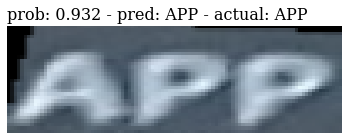

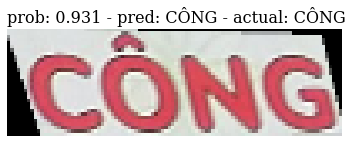

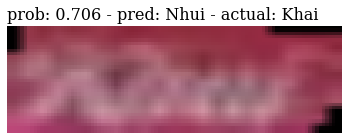

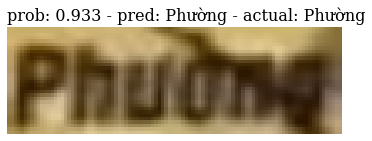

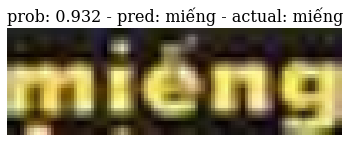

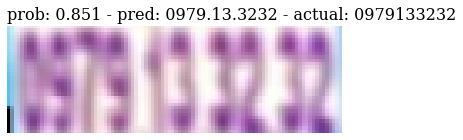

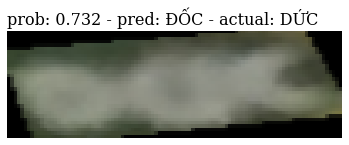

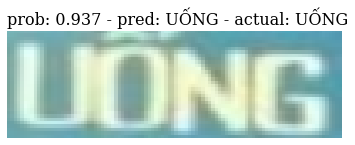

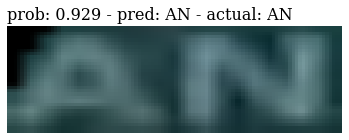

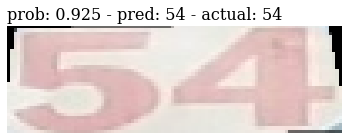

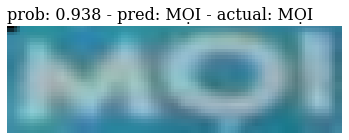

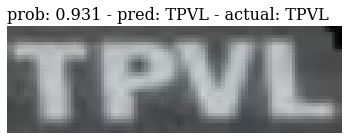

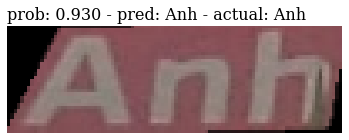

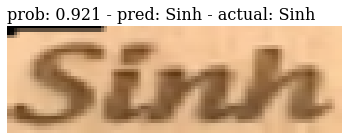

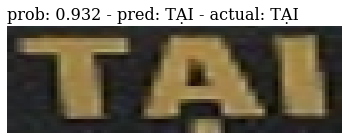

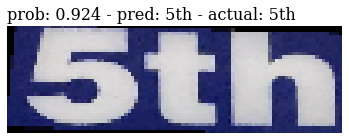

In [ ]:
trainer.visualize_prediction()

Visualize prediction from our trained model


# Testing

/content/drive/MyDrive/vietocr


  0%|          | 0/28 [00:00<?, ?it/s]

a.png (427, 640, 3)


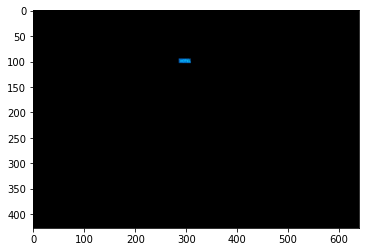

  4%|▎         | 1/28 [00:00<00:10,  2.67it/s]

['THANH', 0.27276268750429156]
b.png (100, 1044, 3)


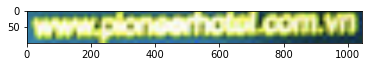

  7%|▋         | 2/28 [00:01<00:18,  1.40it/s]

['www.ploneerhotol.com', 0.8649540320038795]
c.png (100, 182, 3)


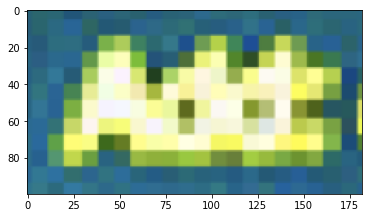

 11%|█         | 3/28 [00:02<00:18,  1.36it/s]

['Add:', 0.9238916784524918]
d.png (100, 183, 3)


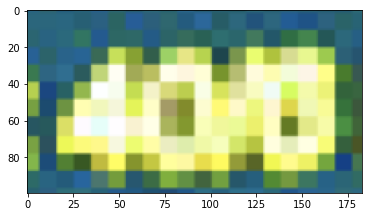

 14%|█▍        | 4/28 [00:02<00:16,  1.47it/s]

['400', 0.9292114774386088]
e.png (100, 258, 3)


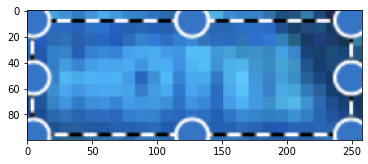

 18%|█▊        | 5/28 [00:03<00:15,  1.51it/s]

['HOÀN', 0.6998184323310852]
f.png (100, 200, 3)


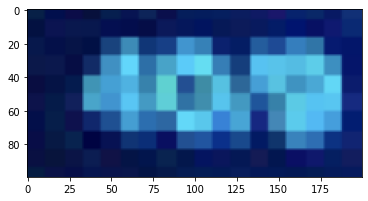

 21%|██▏       | 6/28 [00:04<00:14,  1.49it/s]

['40/3', 0.8620519042015076]
g.png (116, 304, 3)


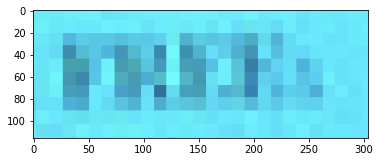

 25%|██▌       | 7/28 [00:04<00:13,  1.57it/s]

['TRIP', 0.7190694473683834]
h.png (100, 250, 3)


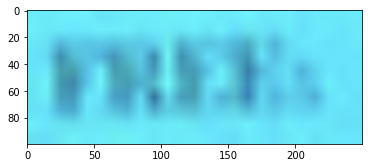

 29%|██▊       | 8/28 [00:05<00:12,  1.66it/s]

['FREES', 0.9253779768943786]
i.png (103, 250, 3)


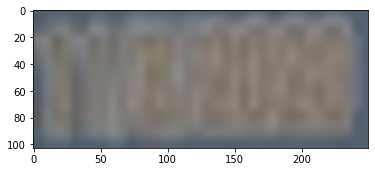

 32%|███▏      | 9/28 [00:05<00:12,  1.58it/s]

['THEP029', 0.4365262027297701]
j.png (100, 170, 3)


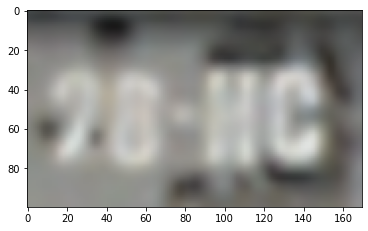

 36%|███▌      | 10/28 [00:06<00:11,  1.52it/s]

['28-HC', 0.9164924502372742]
k.png (100, 72, 3)


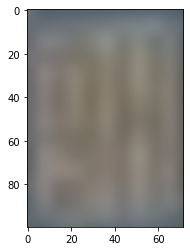

 39%|███▉      | 11/28 [00:07<00:10,  1.60it/s]

['9H', 0.8816296756267548]
l.png (100, 200, 3)


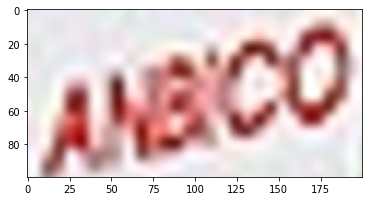

 43%|████▎     | 12/28 [00:07<00:11,  1.43it/s]

['ANBICO', 0.9271174172560374]
m.png (100, 87, 3)


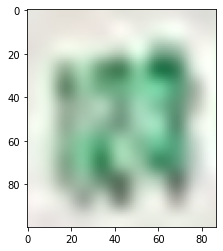

 46%|████▋     | 13/28 [00:08<00:09,  1.58it/s]

['129', 0.8845226168632507]
n.png (100, 51, 3)


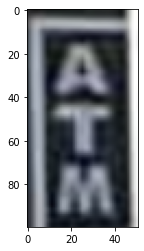

 50%|█████     | 14/28 [00:08<00:08,  1.66it/s]

['Â', 0.4704832434654236]
o.png (100, 58, 3)


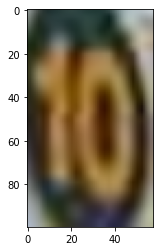

 54%|█████▎    | 15/28 [00:09<00:07,  1.75it/s]

['10', 0.9299183785915375]
p.png (104, 231, 3)


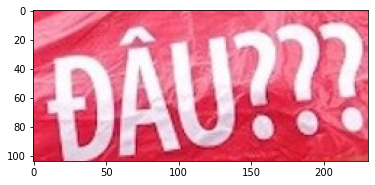

 57%|█████▋    | 16/28 [00:10<00:07,  1.68it/s]

['ĐÂU', 0.936546266078949]
q.png (100, 155, 3)


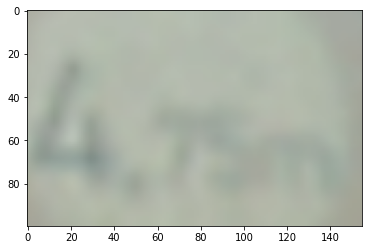

 61%|██████    | 17/28 [00:10<00:06,  1.67it/s]

['4,75m', 0.9359733581542968]
r.png (100, 76, 3)


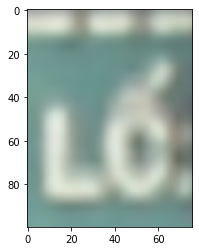

 64%|██████▍   | 18/28 [00:11<00:05,  1.84it/s]

['LỐ', 0.9221155941486359]
s.png (100, 163, 3)


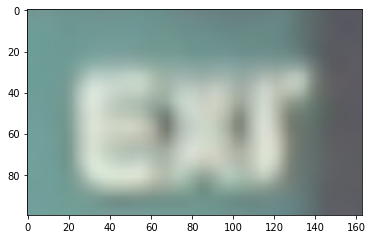

 68%|██████▊   | 19/28 [00:11<00:04,  1.88it/s]

['EXI', 0.9223827918370565]
t.png (100, 289, 3)


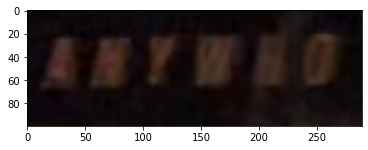

 71%|███████▏  | 20/28 [00:12<00:04,  1.71it/s]

['ANYVIO', 0.8733801543712616]
u.png (100, 182, 3)


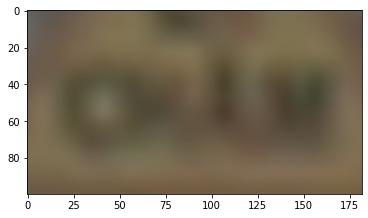

 75%|███████▌  | 21/28 [00:12<00:04,  1.72it/s]

['CHĂM', 0.9366217106580734]
v.png (100, 173, 3)


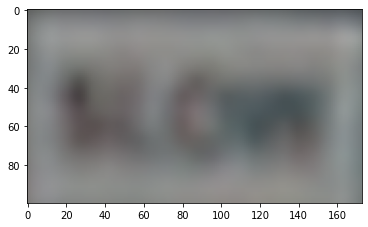

 79%|███████▊  | 22/28 [00:13<00:03,  1.69it/s]

['SLOW', 0.7770232632756233]
w.png (100, 319, 3)


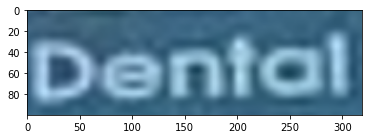

 82%|████████▏ | 23/28 [00:14<00:03,  1.62it/s]

['Dental', 0.9215255081653595]
x.png (100, 265, 3)


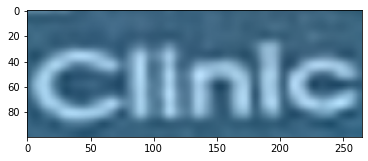

 86%|████████▌ | 24/28 [00:15<00:02,  1.48it/s]

['Clinic', 0.9289866586526235]
y.png (100, 183, 3)


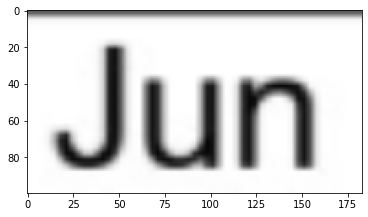

 89%|████████▉ | 25/28 [00:15<00:01,  1.63it/s]

['Jun', 0.9267255862553915]
2.png (112, 38, 3)


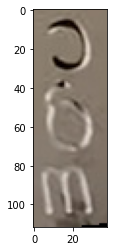

 93%|█████████▎| 26/28 [00:16<00:01,  1.66it/s]

['3', 0.1372503936290741]
3.png (145, 51, 3)


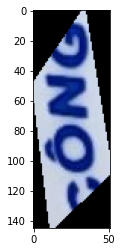

 96%|█████████▋| 27/28 [00:16<00:00,  1.62it/s]

['NG', 0.23939558366934457]


AttributeError: ignored

In [ ]:
# !pip install vietocr==0.3.7
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import os
import cv2
%cd /content/drive/MyDrive/vietocr
config = Cfg.load_config_from_file('2021-12-12config.yml') # sử dụng config của các bạn được export lúc train nếu đã thay đổi tham số  
# config = Cfg.load_config_from_name('vgg_transformer') # sử dụng config mặc định của mình 
config['weights'] = '/content/drive/MyDrive/vietocr/weights/w_36000_2021-12-12_0.7927036199095022_0.86977553.pth' # đường dẫn đến trọng số đã huấn luyện hoặc comment để sử dụng pretrained model của mình
config['device'] = 'cpu' # device chạy 'cuda:0', 'cuda:1', 'cpu'

detector = Predictor(config)
redir='/content/drive/MyDrive/vietocr/sample/'
# redir='/content/drive/MyDrive/vietocr/testb1/'
dem=0
for filename in tqdm(os.listdir(redir)):
  # dem+=1
  # if filename == '.DS_Store': continue
  img=cv2.imread(redir+filename) # open image using openCV2
  #resize
  if img.shape[0]<100:
      rate=img.shape[0]/100
      h=100
      w=int(img.shape[1]/rate)
      img=cv2.resize(img,(w,h))

  color_coverted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  pil_image=Image.fromarray(color_coverted)
  print(filename,img.shape)
  plt.imshow(pil_image)
  plt.show()
  # dự đoán 
  s = detector.predict(pil_image, return_prob=True) # muốn trả về xác suất của câu dự đoán thì đổi return_prob=True
  guess=list(s)
  if guess[1]<0.7 and img.shape[0]>2*img.shape[1]: #dạng img này lấy từ img đọc cv2
    # Rotate Image By 180 Degree
    rotated_image1 = pil_image.rotate(270) #này là dạng img từ pil
    rotated_image2 = pil_image.rotate(90)
    s1=detector.predict(rotated_image1, return_prob=True)
    s2=detector.predict(rotated_image2, return_prob=True)
    if s1[1]>0.7 and s1[1]>s2[1]:
        guess[0]=s1[0]
    elif s2[1]>0.7 and s2[1]>s1[1]:
        guess[0]=s2[0]
  print(guess)



/content/drive/MyDrive/vietocr


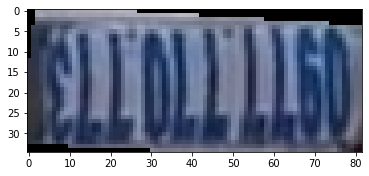

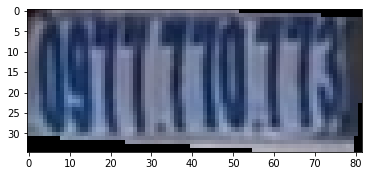

('EL1OLD.1150', 0.6657416278665717) ('0977.110.173', 0.8832581490278244)


In [ ]:
# !pip install vietocr==0.3.7
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from tqdm import tqdm
import os
%cd /content/drive/MyDrive/vietocr
config = Cfg.load_config_from_file('2021-12-12config.yml') # sử dụng config của các bạn được export lúc train nếu đã thay đổi tham số  
# config = Cfg.load_config_from_name('vgg_transformer') # sử dụng config mặc định của mình 
# đường dẫn đến trọng số đã huấn luyện hoặc comment để sử dụng pretrained model của mình
config['weights'] = '/content/drive/MyDrive/vietocr/weightsfullnew/w_46000_2021-12-15_0.793552036199095_0.8708498.pth' 
config['device'] = 'cpu' # device chạy 'cuda:0', 'cuda:1', 'cpu'

detector = Predictor(config)
img = '/content/drive/MyDrive/vietocr/sample/1.png'
# img = Image.open(img)
img=cv2.imread(img) # open image using openCV2
color_coverted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pil_image=Image.fromarray(color_coverted)
rotated_image1=pil_image.rotate(270, expand=1) #này là dạng img từ pil
rotated_image2 = pil_image.rotate(90, expand=1)

s1=detector.predict(rotated_image1, return_prob=True)
s2=detector.predict(rotated_image2, return_prob=True)
# if s1[1]>0.7 and s1[1]>s2[1]:
#     guess[0]=s1[0]
# elif s2[1]>0.7 and s2[1]>s1[1]:
#     guess[0]=s2[0]
plt.imshow(rotated_image1)
plt.show()
plt.imshow(rotated_image2)
plt.show()
# dự đoán 
s = detector.predict(pil_image, return_prob=True) # muốn trả về xác suất của câu dự đoán thì đổi return_prob=True
print(s1,s2)

In [ ]:
!zip -r /content/drive/MyDrive/vietocr/dataset/PredictAnormTrans.zip /content/drive/MyDrive/vietocr/dataset/PredictAnormTrans

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()

(0.9940476190476191, 0.99732643)